[[ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  5  5  5  5  5  5  5  5  5  5  5  5]
 [10 10 10 10 10 10 10 10 10 10 10 10 10]
 [15 15 15 15 15 15 15 15 15 15 15 15 15]
 [20 20 20 20 20 20 20 20 20 20 20 20 20]
 [25 25 25 25 25 25 25 25 25 25 25 25 25]
 [30 30 30 30 30 30 30 30 30 30 30 30 30]
 [35 35 35 35 35 35 35 35 35 35 35 35 35]
 [40 40 40 40 40 40 40 40 40 40 40 40 40]
 [45 45 45 45 45 45 45 45 45 45 45 45 45]
 [50 50 50 50 50 50 50 50 50 50 50 50 50]
 [55 55 55 55 55 55 55 55 55 55 55 55 55]
 [60 60 60 60 60 60 60 60 60 60 60 60 60]
 [65 65 65 65 65 65 65 65 65 65 65 65 65]
 [70 70 70 70 70 70 70 70 70 70 70 70 70]]


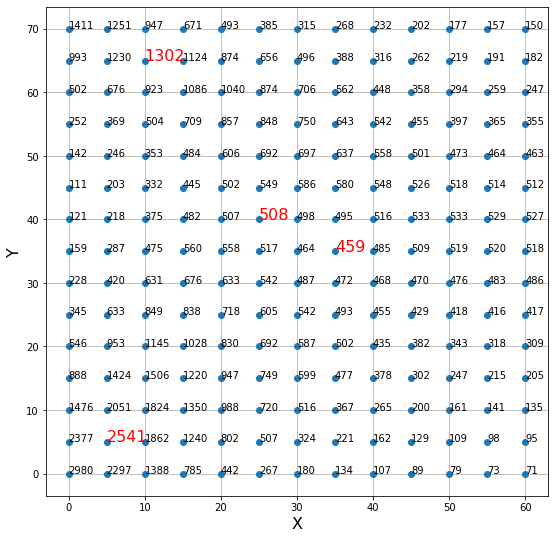

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = []
y = []
z = []

with open("example2.csv") as f:
    reader = csv.reader(f)
    for row in [row for row in reader]:
        x.append(row[0])
        y.append(int(row[1]))
        z.append(int(row[2]))
x = [int(r) for r in x[1:]]
x.insert(0, 0)

num_cols = np.count_nonzero(np.array(y) == 0)
num_rows = np.count_nonzero(np.array(x) == 0)
X = np.array(x).reshape((num_cols, num_rows)).T
Y = np.array(y).reshape((num_cols, num_rows)).T
Z = np.array(z).reshape((num_cols, num_rows)).T
dx_array = np.zeros((num_rows, num_cols-1))
pxx_array = np.zeros((num_rows, num_cols-1))
pxy_array = np.zeros((num_rows, num_cols-1))
dy_array = np.zeros((num_rows-1, num_cols))
pyx_array = np.zeros((num_rows-1, num_cols))
pyy_array = np.zeros((num_rows-1, num_cols))
print(Y)

for i in range(num_rows - 1):
    dy_array[i][0] = (Z[i+1][0] - Z[i][0]) / (Y[i+1][0] - Y[i][0])
    pyy_array[i][0] = (Y[i+1][0] + Y[i][0]) / 2
    pyx_array[i][0] = X[i][0]

    for j in range(num_cols - 1):
        dx_array[i][j] = (Z[i][j+1] - Z[i][j]) / (X[i][j+1] - X[i][j])
        pxx_array[i][j] = (X[i][j+1] + X[i][j]) / 2
        pxy_array[i][j] = Y[i][j+1]
        
        dy_array[i][j+1] = (Z[i+1][j+1] - Z[i][j+1]) / (Y[i+1][j+1] - Y[i][j+1])
        pyy_array[i][j+1] = (Y[i+1][j+1] + Y[i][j+1]) / 2
        pyx_array[i][j+1] = X[i][j+1]
        
        dx_array[num_rows - 1][j] = (Z[num_rows - 1][j+1] - Z[num_rows - 1][j]) / (X[num_rows - 1][j+1] - X[num_rows - 1][j])
        pxx_array[num_rows - 1][j] = (X[num_rows - 1][j+1] + X[num_rows - 1][j]) / 2
        pxy_array[num_rows - 1][j] = Y[num_rows - 1][0]
        
pdxx, pdxy = pxx_array.reshape(-1), pxy_array.reshape(-1)
pdyx, pdyy = pyx_array.reshape(-1), pyy_array.reshape(-1)
pdx = dx_array.reshape(-1)
pdy = dy_array.reshape(-1)
        
dx_array_rescale = dx_array[1: num_rows-1, :]
dy_array_rescale = dy_array[:, 1:num_cols-1]

evx_array = np.zeros((num_rows-2, num_cols-2))
evy_array = np.zeros((num_rows-2, num_cols-2))

for i in range(num_rows - 2):
    for j in range(num_cols - 2):
        evx_array[i][j] = (dx_array_rescale[i][j+1] * dx_array_rescale[i][j]) < 0
        evy_array[i][j] = (dy_array_rescale[i+1][j] * dy_array_rescale[i][j]) < 0
ev_array = np.pad(evy_array*evx_array, (1, 1), "constant").T
ev = ev_array.reshape(len(z))



plt.figure(figsize=(9, 9))
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.grid()
plt.plot(x, y, marker='o', linestyle='')
for i in range(len(z)):
    if ev[i]:
        plt.text(x[i], y[i], str(z[i]), fontsize=16, color="red")
    else:
        plt.text(x[i], y[i], str(z[i]))
        


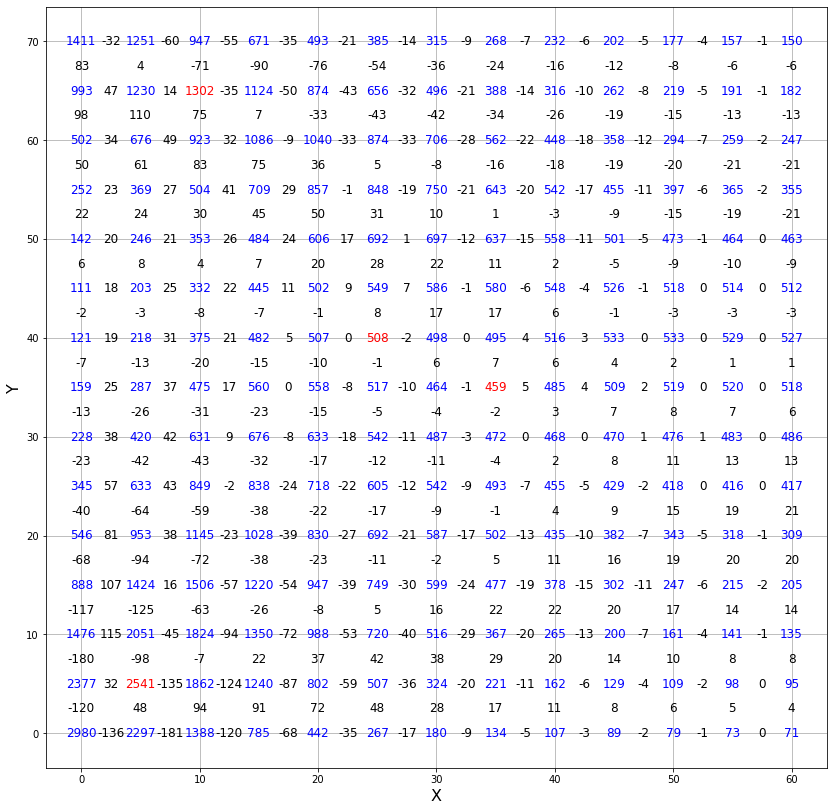

In [2]:
plt.figure(figsize=(14, 14))
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.grid()
plt.plot(x, y, linestyle='')
plt.plot(pdxx, pdxy, linestyle='', color='green')
plt.plot(pdyx, pdyy, linestyle='', color='green')

for i in range(len(z)):
    if ev[i]:
        plt.text(x[i], y[i], str(z[i]), fontsize=12, color="red", horizontalalignment='center', verticalalignment='center')
    else:
        plt.text(x[i], y[i], str(z[i]), fontsize=12, color="blue", horizontalalignment='center', verticalalignment='center')

for i in range(pdx.size):
    plt.text(pdxx[i], pdxy[i], int(pdx[i]), fontsize=12, horizontalalignment='center', verticalalignment='center')

for i in range(pdy.size):
    plt.text(pdyx[i], pdyy[i], int(pdy[i]), fontsize=12, horizontalalignment='center', verticalalignment='center')